In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
area = np.random.randint(500,900,40)
price = np.random.randint(30,99,40)

In [3]:
area

array([682, 835, 640, 890, 671, 729, 562, 541, 650, 684, 743, 824, 785,
       628, 770, 688, 825, 581, 743, 841, 807, 536, 665, 871, 795, 588,
       572, 855, 722, 856, 596, 852, 783, 742, 663, 818, 802, 656, 702,
       593])

In [4]:
price

array([54, 61, 92, 68, 79, 44, 71, 93, 61, 32, 98, 47, 89, 52, 79, 67, 71,
       34, 69, 66, 67, 65, 68, 63, 91, 51, 94, 32, 54, 86, 42, 49, 83, 56,
       46, 78, 70, 88, 82, 57])

In [5]:
area.sort()
price.sort()

In [6]:
area

array([536, 541, 562, 572, 581, 588, 593, 596, 628, 640, 650, 656, 663,
       665, 671, 682, 684, 688, 702, 722, 729, 742, 743, 743, 770, 783,
       785, 795, 802, 807, 818, 824, 825, 835, 841, 852, 855, 856, 871,
       890])

In [7]:
price

array([32, 32, 34, 42, 44, 46, 47, 49, 51, 52, 54, 54, 56, 57, 61, 61, 63,
       65, 66, 67, 67, 68, 68, 69, 70, 71, 71, 78, 79, 79, 82, 83, 86, 88,
       89, 91, 92, 93, 94, 98])

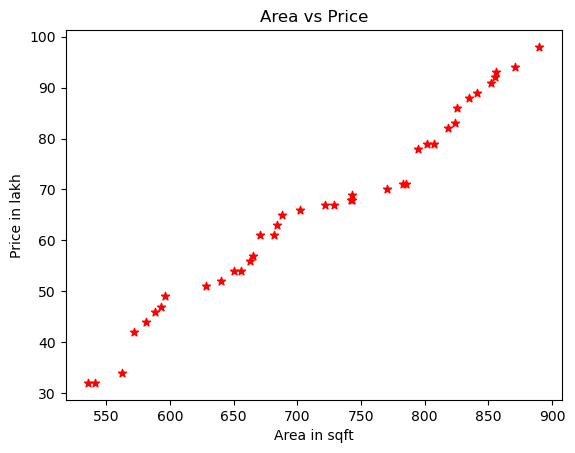

In [8]:
%matplotlib inline
plt.title("Area vs Price")
plt.xlabel("Area in sqft")
plt.ylabel("Price in lakh")
plt.scatter(area,price, marker ="*",c ="r")
plt.show()

In [9]:
data ={"Area":area,"Price":price}


In [10]:
df =pd.DataFrame(data)

In [11]:
df

,Area,Price
0,536,32
1,541,32
2,562,34
3,572,42
4,581,44
5,588,46
6,593,47
7,596,49
8,628,51
9,640,52


In [12]:
x = df.drop("Price",axis = 1)
y = df["Price"]

In [13]:
x.head(3)

,Area
0,536
1,541
2,562


In [14]:
y.head(3)

0    32
1    32
2    34
Name: Price, dtype: int32

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(x,y)

LinearRegression()

In [18]:
model.predict([[650]])

C:\Users\Netcomm\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54.15438532])

In [19]:
model.predict([[1200]])

C:\Users\Netcomm\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([149.47151489])

In [20]:
y_pred = model.predict(x)

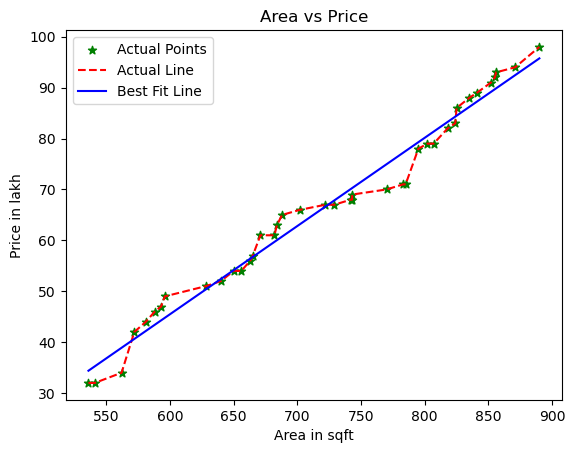

In [21]:
%matplotlib inline
plt.title("Area vs Price")
plt.xlabel("Area in sqft")
plt.ylabel("Price in lakh")
plt.scatter(area,price, marker ="*",c ="g")
plt.plot(area,price, 'r--')
plt.plot(area,y_pred, 'b-')
plt.legend(["Actual Points","Actual Line","Best Fit Line"])
plt.show()

In [22]:
coef = model.coef_
intercept = model.intercept_

In [23]:
print("coefficient of x is",coef)
print("intercept of y is",intercept)

coefficient of x is [0.17330387]
intercept of y is -58.493131445481765


In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y, y_pred)

0.977118814540524

In [26]:
SSE = ((y - y_pred)**2).sum()
SSE

291.8947108768996

In [27]:
MSE =(((y - y_pred)**2).sum()) / len(y)
MSE

7.29736777192249

In [28]:
MAE =((np.absolute(y - y_pred)**2).sum()) / len(y)
MAE

7.29736777192249

In [29]:
TSE =((y - y.mean())**2).sum()
TSE

12756.975000000002

In [30]:
R2 = 1 - (SSE/TSE)
R2

0.977118814540524

In [37]:
Adj_R2 = 1 - (((1-R2*(len(y)-1))/(len(y)-1-1)))
Adj_R2              

1.9765166780810641